In [33]:
from binning import DistortionAlignedBinning, distortion_aligned_binning, eqw_binning
from data_generation import generate_A_from_binning, generate_A_from_binning_eff

In [34]:
from skimage import data, io, filters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
camera = np.array([[2, 8, 9, 7, 2],
                   [1, 3, 6, 4, 1],
                   [0, 2, 5, 2, 0],
                   [1, 4, 6, 3, 1],
                   [2, 7, 9, 8, 2]])

In [36]:
camera = np.array([[2, 8, 10, 7, 2],
                   [1, 4, 7, 5, 1],
                   [0, 3, 6, 3, 0],
                   [1, 5, 7, 4, 1],
                   [2, 7, 9, 8, 2]])

In [37]:
camera = (camera - camera.min()) / (camera.max() - camera.min())

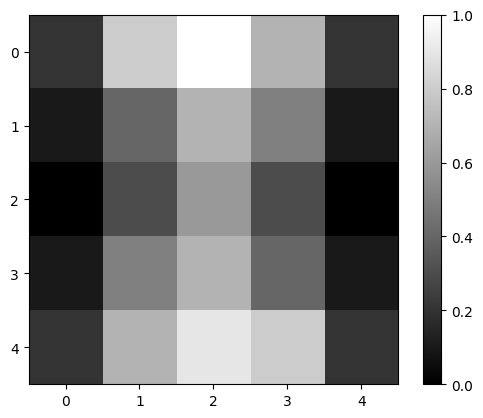

In [38]:
plt.imshow(camera, cmap='gray')
plt.colorbar()

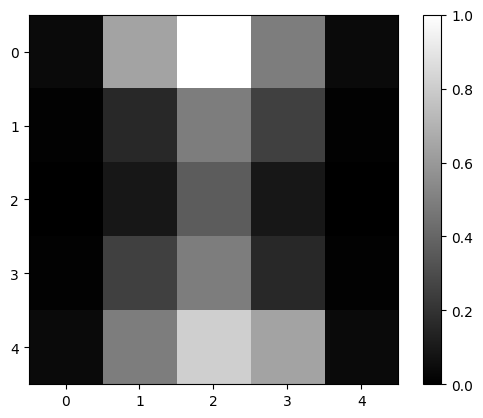

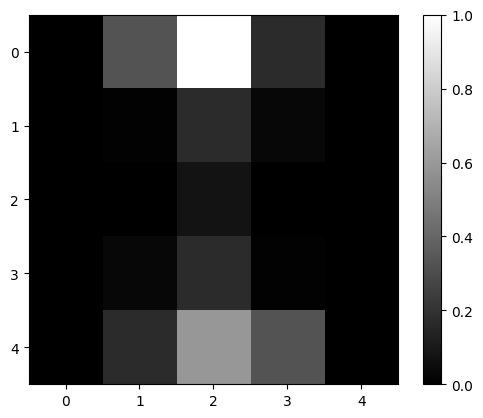

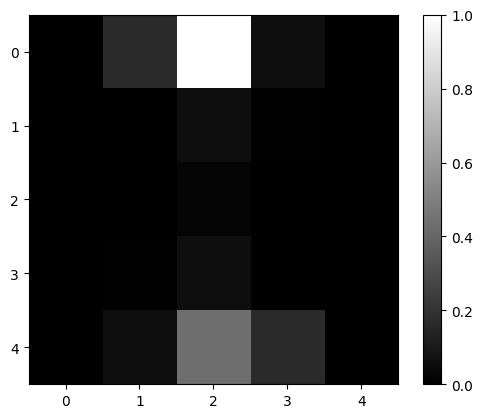

In [39]:
for gamma in [2, 5, 8]:
    tmp = camera**gamma
    tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
    plt.imshow(tmp, cmap='gray')
    plt.colorbar()
    plt.show()

In [40]:
camera

array([[0.2, 0.8, 1. , 0.7, 0.2],
       [0.1, 0.4, 0.7, 0.5, 0.1],
       [0. , 0.3, 0.6, 0.3, 0. ],
       [0.1, 0.5, 0.7, 0.4, 0.1],
       [0.2, 0.7, 0.9, 0.8, 0.2]])

In [41]:
m = np.unique(camera)

In [42]:
distortions = np.logspace(0, 1, 50)

In [43]:
distortions

array([ 1.        ,  1.04811313,  1.09854114,  1.1513954 ,  1.20679264,
        1.26485522,  1.32571137,  1.38949549,  1.45634848,  1.52641797,
        1.59985872,  1.67683294,  1.75751062,  1.84206997,  1.93069773,
        2.02358965,  2.12095089,  2.22299648,  2.32995181,  2.44205309,
        2.55954792,  2.6826958 ,  2.8117687 ,  2.9470517 ,  3.0888436 ,
        3.23745754,  3.39322177,  3.55648031,  3.72759372,  3.90693994,
        4.09491506,  4.29193426,  4.49843267,  4.71486636,  4.94171336,
        5.17947468,  5.42867544,  5.68986603,  5.96362332,  6.25055193,
        6.55128557,  6.86648845,  7.19685673,  7.54312006,  7.90604321,
        8.28642773,  8.68511374,  9.10298178,  9.54095476, 10.        ])

In [44]:
C = np.zeros(shape=(m.shape[0], m.shape[0]))
for d in distortions:
    C = C + np.outer(m, m)
C = C / m.shape[0]

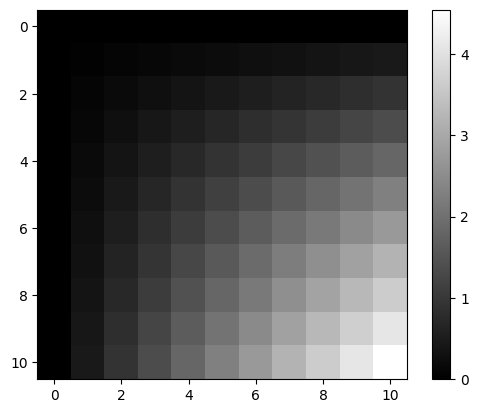

In [45]:
plt.imshow(C, cmap='gray')
plt.colorbar()

In [46]:
C.shape

(11, 11)

In [47]:
binning, A, SCS = distortion_aligned_binning(t=camera.flatten(), C=C, n_bins=3, return_details=True, validate=True)
#binning = distortion_aligned_binning(t=camera, C=C, n_bins=5)

optimized changed objective: 28.005944, exact changed objective: 28.005944
optimized changed objective: 28.120130, exact changed objective: 28.120130
optimized changed objective: 26.304367, exact changed objective: 26.304367
optimized changed objective: 24.213203, exact changed objective: 24.213203
optimized changed objective: 28.005682, exact changed objective: 28.005682
optimized changed objective: 27.566883, exact changed objective: 27.566883
optimized changed objective: 28.231061, exact changed objective: 28.231061
optimized changed objective: 25.578283, exact changed objective: 25.578283
optimized changed objective: 28.954545, exact changed objective: 28.954545
optimized changed objective: 28.821212, exact changed objective: 28.821212
optimized changed objective: 28.253247, exact changed objective: 28.253247
optimized changed objective: 28.071096, exact changed objective: 28.071096
optimized changed objective: 28.639291, exact changed objective: 28.639291
optimized changed objecti

In [48]:
binning

array([0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2,
       2, 2, 0])

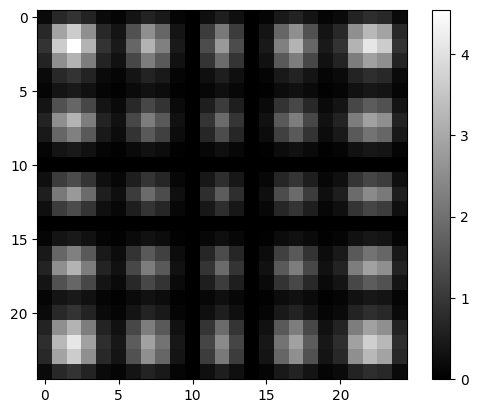

In [49]:
plt.imshow(SCS, cmap='gray')
plt.colorbar()

In [50]:
eqwb = eqw_binning(camera.flatten(), n_bins=3)

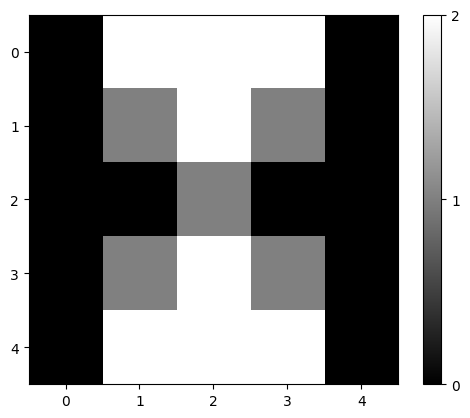

In [51]:
plt.imshow(eqwb.reshape(5, 5), cmap='gray')
plt.colorbar(ticks=[0, 1, 2])

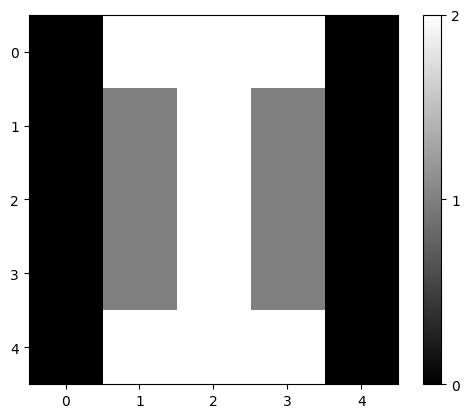

In [52]:
plt.imshow(binning.reshape(5, 5), cmap='gray')
plt.colorbar(ticks=[0, 1, 2])

In [53]:
A_eqw = generate_A_from_binning_eff(eqwb)

In [54]:
np.sum(np.multiply(A_eqw, SCS))

29.014772727272714

In [55]:
A_da = generate_A_from_binning_eff(binning)

In [56]:
np.sum(np.multiply(A_da, SCS))

29.063636363636355

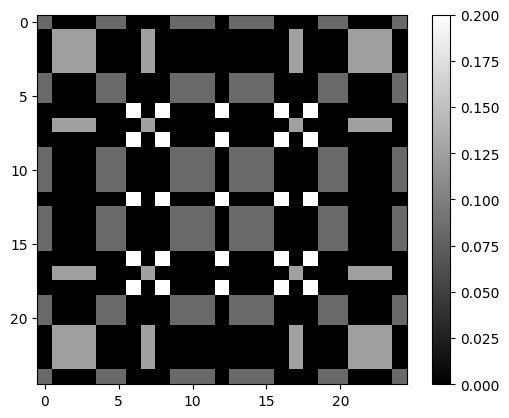

In [57]:
plt.imshow(A_eqw, cmap='gray')
plt.colorbar()

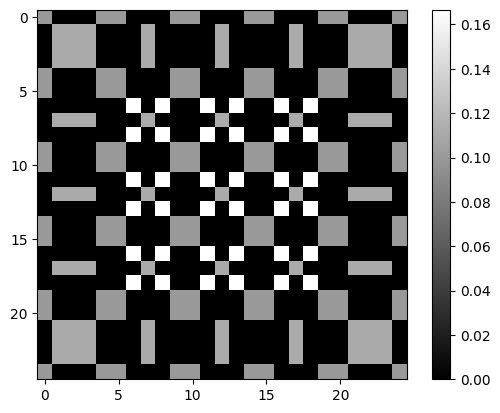

In [58]:
plt.imshow(A_da, cmap='gray')
plt.colorbar()

In [59]:
dab = DistortionAlignedBinning(template=camera.flatten(), C=C, n_bins=5)

In [60]:
dab.get_binning()

array([1, 3, 4, 3, 1, 0, 2, 3, 2, 0, 0, 1, 3, 1, 0, 0, 2, 3, 2, 0, 1, 3,
       4, 3, 1])